# DiamondProphet:

# Predicting Diamond Prices with Data Analytics!



# `Description of the project:`
PriceGem is an innovative data science and machine learning project aimed at predicting diamond prices with unparalleled accuracy. Diamonds are unique gemstones, and their value is influenced by multiple factors such as carat weight, cut quality, clarity, and color grade. Traditional pricing methods often rely on subjective human assessment, making it challenging to obtain precise valuations.

The PriceGem project leverages advanced data science techniques and machine learning algorithms to create a robust predictive model. We begin by curating a vast dataset of historical diamond sales and expert valuations. This dataset encompasses diamonds of varying characteristics, from different sources and market conditions. With this comprehensive data at our disposal, our model learns the intricate relationships between diamond attributes and their corresponding market prices.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#here  first we are read the given data
data=pd.read_csv("diamonds.csv")
#head-->first five data present
data.head()



,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# `Explaination of Particular Columns:`

Column 1-->Carat (Weight): We analyze the impact of carat weight on diamond prices and understand how pricing scales with size.

Column 2-->Cut (Quality): The model examines the intricacies of diamond cuts, from ideal to poor, and assesses their influence on overall value.

Column 3-->Color (Grade): The model dissects the role of color in diamond pricing, accounting for colorless to colored stones.

Column 4-->Clarity (Grade): We quantify the effect of clarity grades, determining how imperfections can affect diamond prices.

Column 5-->Depth its measurement from top to bottom, from the table on the top of the diamond to the culet at its base.

Column 6--> Table the facet which can be seen when the stone is viewed face up.

Column 7-->Price PriceGem is continuously updated with the latest market trends and external factors that could influence diamond prices.

Column 8-->X Y Z: Color grades, otherwise known as 'Cape Diamonds,' are the beginning of the yellow color scale. These stones with color grading X-Y-Z will be mentioned in the GIA certificate as "X-Y-Z, Light Yellow." Above this grade, starts the regular and full Fancy color scale; Fancy Light Yellow.

In [ ]:
#tail-->last five data present
data.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [ ]:
#sample--> random data present
data.sample(3)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
3472,3473,0.76,Very Good,G,VVS2,61.5,59.0,3394,5.83,5.91,3.61
37016,37017,0.33,Premium,G,VVS2,61.0,58.0,965,4.48,4.44,2.72
24468,24469,1.70,Premium,I,VS1,59.8,59.0,12737,7.79,7.70,4.63


In [ ]:
#info-->print the information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
#returns description of the data in the DataFrame
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [ ]:
#dtypes-->finding given data in (integer,float)
data.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

In [ ]:
#COUNT always returns an int data type value
data.count()

Unnamed: 0    53940
carat         53940
cut           53940
color         53940
clarity       53940
depth         53940
table         53940
price         53940
x             53940
y             53940
z             53940
dtype: int64

In [ ]:
# Finding sum of number of missing values in each column
print(data.isnull().sum())

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64


# `Dropping Uneccesary Columns :`

In [ ]:
#dropping or removing column
data = data.drop("Unnamed: 0",axis=1)


In [ ]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<ipython-input-72-3a228fe86bbd>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

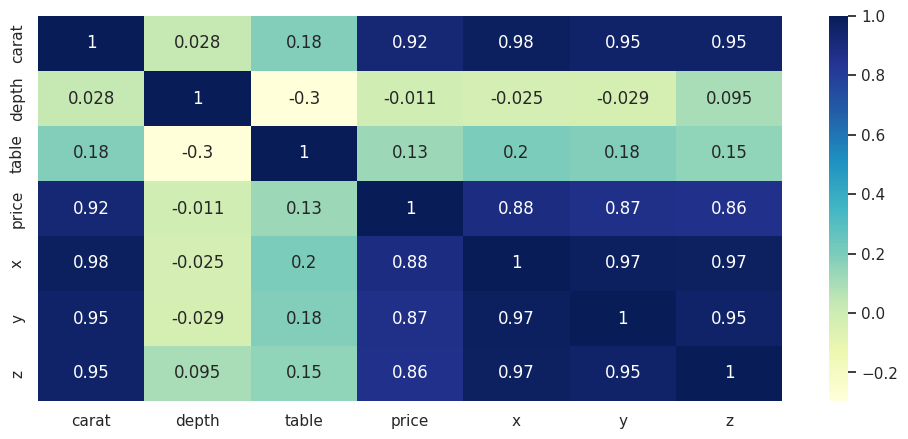

In [ ]:
##using "matplotlib" is a python library used for data visualization
plt.figure(figsize=(12, 5))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True, cmap="YlGnBu")

In [ ]:
#Mean-->(average) of a data set is found by adding all
#numbers in the data set and then dividing by the number of values in the set

data.mean()

<ipython-input-73-49fef9056a00>:4: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [ ]:
#medain-->is the middle value when a data set is ordered from least to greatest
data.median()

<ipython-input-14-eaebb145c05d>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.median()


carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

In [ ]:
#maxiumum-->returns the item with the highest value
data.max()

carat           5.01
cut        Very Good
color              J
clarity         VVS2
depth           79.0
table           95.0
price          18823
x              10.74
y               58.9
z               31.8
dtype: object

In [ ]:
#minimum-->return the item with the lastest value
data.min()

carat       0.2
cut        Fair
color         D
clarity      I1
depth      43.0
table      43.0
price       326
x           0.0
y           0.0
z           0.0
dtype: object

**A` histogram` provides a visual representation of the distribution of a dataset: location, spread and skewness of the data; it also helps to visualize whether the distribution is symmetric or skewed left or right. In addition, if it is unimodal, bimodal or multimodal . It can also show any outliers or gaps in the data.**

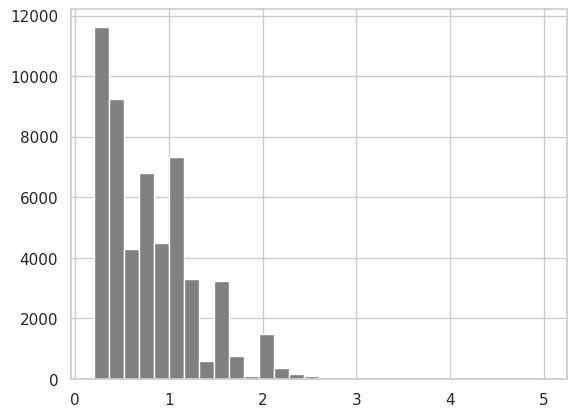

In [ ]:
plt.hist(data['carat'],bins=30,color='grey')
plt.show()

# Now I will add a new column to this dataset by calculating the size (length x width x depth) of the diamond:

In [ ]:
data["size"] = data["x"] * data["y"] * data["z"]
data


,carat,cut,color,clarity,depth,table,price,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,140.766120


# **Now let’s have a look at the relationship between the size of a diamond and its price:**



*  Premium cut diamonds are relatively large than other diamonds.
*   There’s a linear relationship between the size of all types of diamonds and their prices.



In [ ]:

import plotly.express as px
import plotly.graph_objects as go

figure = px.scatter(data_frame = data, x="carat",
                    y="price", size="depth",
                    color= "cut", trendline="ols")
figure.show()

# Now let’s have a look at the prices of all the types of diamonds based on their colour:

In [ ]:
fig = px.box(data, x="cut",
             y="price",
             color="color")
fig.show()

# Now let’s have a look at the correlation between diamond prices and other features in the dataset:

In [ ]:
correlation = data.corr()
print(correlation["price"].sort_values(ascending=False))

price    1.000000
carat    0.921591
size     0.902385
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


<ipython-input-79-7d8b451e654a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# `Splitting the data into x and y:`

Splitting the data into X and y refers to separating the input features and the target variable from the dataset.

'x' represents the input features or independent variables. These are the characteristics or attributes of the data that are used to make predictions.

'y' represents the target variable or dependent variable. This is the value we want to predict or classify based on the input features.



In [ ]:
# Assuming the middle column index based on integer division
middle_column_index = len(data.columns) // 2

# Create feature matrix X by dropping the middle column
X = data.drop(["price"], axis=1)

y = data['price']

# If you want to keep the original DataFrame structure, you can reconstruct it
df_new = pd.concat([X, y], axis=1)


In [ ]:
X

,carat,cut,color,clarity,depth,table,x,y,z,size
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,51.917250
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,115.920000
53936,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,118.110175
53937,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,114.449728
53938,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,140.766120


In [ ]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

# `Diamond Price Prediction`

Now, I will move to the task of predicting diamond prices by using all the necessary information from the diamond price analysis done above.

Before moving forward, I will convert the values of the cut column as the cut type of diamonds is a valuable feature to predict the price of a diamond. To use this column, we need to convert its categorical values into numerical values. Below is how we can convert it into a numerical feature:

In [ ]:
data["cut"] = data["cut"].map({"Ideal": 1,
                               "Premium": 2,
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

# `Model Training :`

Here, we will be using `' Linear regression'`. Since, we use linear regression when we want to predict a continuous numerical value (e.g., predicting house prices, sales revenue) based on input features. It finds a linear relationship between the input features and the target variable.

Here, since we don't have much data , we have to give whole `x` and whole `y` to train the model.

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
x = np.array(data[["carat", "cut", "size"]])
y = np.array(data[["price"]])

xtrain, xtest, ytrain, ytest = train_test_split(x, y,
                                                test_size=0.10,
                                                random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(xtrain, ytrain)

<ipython-input-95-7eb15fe9792f>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor()

# Now below is how we can use our machine learning model to predict the price of a diamond:



In [ ]:
print("Diamond Price Prediction")
carat = float(input("Carat Size: "))
cut = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
size = float(input("Size: "))
features = np.array([[carat, cut, size]])
print("Predicted Diamond's Price = ", model.predict(features))

Diamond Price Prediction
Carat Size: 24.56
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 3
Size: 50
Predicted Diamond's Price =  [17545.3215]


# Conclusion:


The conclusion on data science's application to diamond prediction is that it offers valuable insights and accurate predictions for the diamond industry. By leveraging data science techniques and machine learning algorithms, it becomes possible to make informed decisions regarding diamond prices based on various attributes such as carat weight, cut quality, clarity grade, and color grade.


> Market Adaptability: Data science models can adapt to changing market conditions, making them reliable tools for pricing diamonds even in dynamic and fluctuating markets.




# Summary:

 According to the diamond price analysis, we can say that the price and size of premium diamonds are higher than other types of diamonds.